# Ex - GroupBy

In [2]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv"

drinks = pd.read_csv(url)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


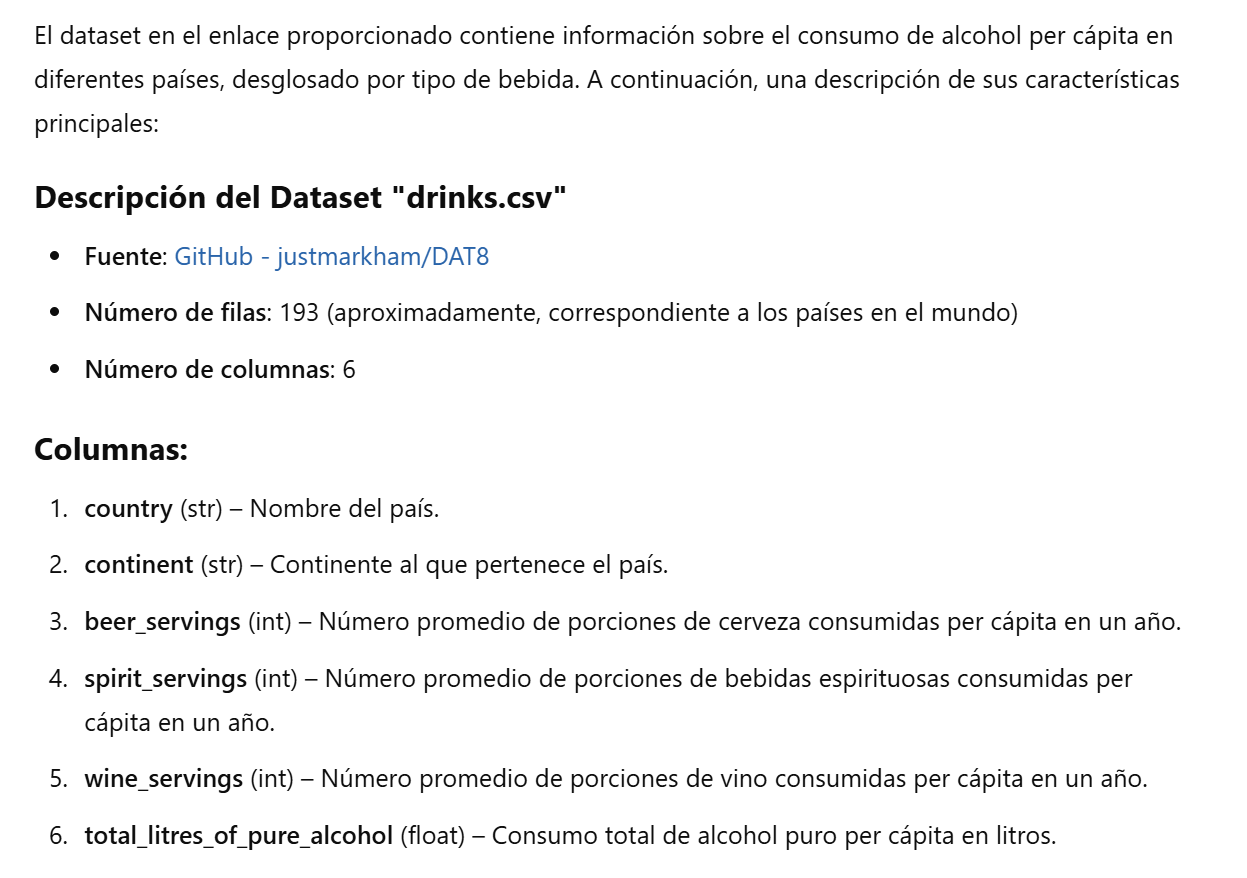

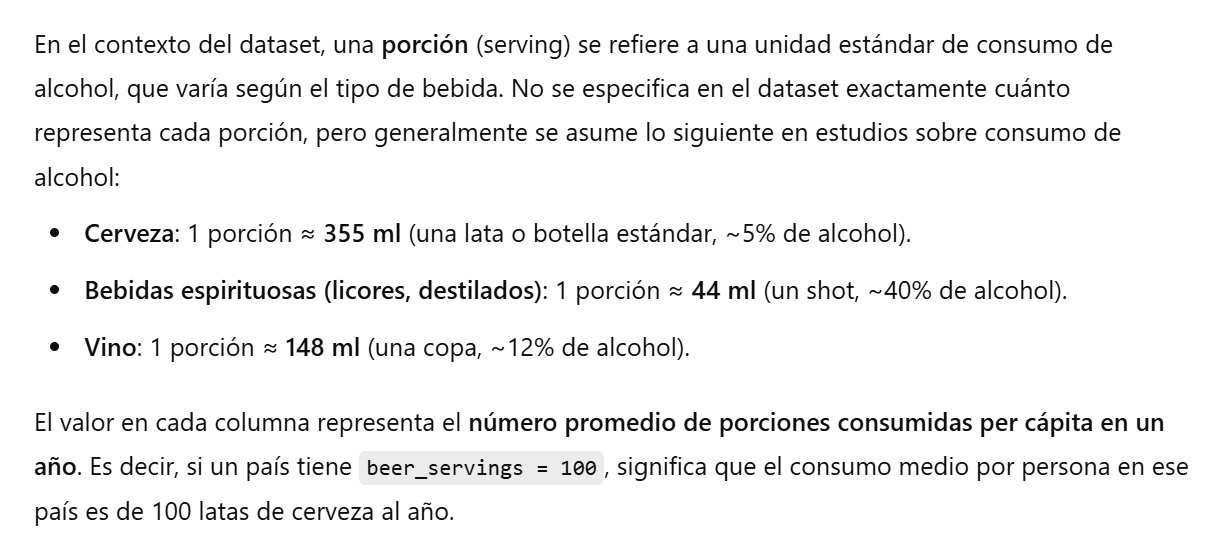

In [39]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [40]:
drinks.describe(include="all")

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,170
unique,193,NaN,NaN,NaN,NaN,5
top,Afghanistan,NaN,NaN,NaN,NaN,AF
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


In [4]:
drinks.loc[drinks["continent"].isna(),"country"]

5                 Antigua & Barbuda
11                          Bahamas
14                         Barbados
17                           Belize
32                           Canada
41                       Costa Rica
43                             Cuba
50                         Dominica
51               Dominican Republic
54                      El Salvador
68                          Grenada
69                        Guatemala
73                            Haiti
74                         Honduras
84                          Jamaica
109                          Mexico
122                       Nicaragua
130                          Panama
143               St. Kitts & Nevis
144                       St. Lucia
145    St. Vincent & the Grenadines
174               Trinidad & Tobago
184                             USA
Name: country, dtype: object

In [8]:
drinks.loc[drinks["continent"].isna(),"country"].fillna("NA",inplace=True)

In [9]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [10]:
drinks["Columna Tonta"] = "NA"

In [11]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Columna Tonta
0,Afghanistan,0,0,0,0.0,AS,NA
1,Albania,89,132,54,4.9,EU,NA
2,Algeria,25,0,14,0.7,AF,NA
3,Andorra,245,138,312,12.4,EU,NA
4,Angola,217,57,45,5.9,AF,NA
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,NA
189,Vietnam,111,2,1,2.0,AS,NA
190,Yemen,6,0,0,0.1,AS,NA
191,Zambia,32,19,4,2.5,AF,NA


In [14]:
drinks.loc[drinks["continent"].isna()] = "NA"
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   country                       193 non-null    object
 1   beer_servings                 193 non-null    object
 2   spirit_servings               193 non-null    object
 3   wine_servings                 193 non-null    object
 4   total_litres_of_pure_alcohol  193 non-null    object
 5   continent                     193 non-null    object
 6   Columna Tonta                 193 non-null    object
dtypes: object(7)
memory usage: 10.7+ KB


In [42]:
continent_map = {
    "Antigua & Barbuda": "North America",
    "Bahamas": "North America",
    "Barbados": "North America",
    "Belize": "North America",
    "Canada": "North America",
    "Costa Rica": "North America",
    "Cuba": "North America",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "El Salvador": "North America",
    "Grenada": "North America",
    "Guatemala": "North America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Jamaica": "North America",
    "Mexico": "North America",
    "Nicaragua": "North America",
    "Panama": "North America",
    "St. Kitts & Nevis": "North America",
    "St. Lucia": "North America",
    "St. Vincent & the Grenadines": "North America",
    "Trinidad & Tobago": "North America",
    "USA": "North America"
}

In [43]:
drinks["continent"] = drinks["continent"].fillna(drinks["country"].map(continent_map))
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### Step 4. Which continent drinks more beer on average?

In [44]:
drinks.groupby("continent")['beer_servings'].mean().idxmax()

'EU'

In [46]:
drinks.groupby("continent")['beer_servings'].mean().round(1)

continent
AF                61.5
AS                37.0
EU               193.8
North America    145.4
OC                89.7
SA               175.1
Name: beer_servings, dtype: float64

In [47]:
drinks[drinks['continent'].isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent


In [48]:
#drinks[drinks['continent'].isnull()]['continent'] = "NCA"
drinks[drinks['continent'].isnull()].index

Index([], dtype='int64')

In [49]:
drinks.loc[drinks[drinks['continent'].isnull()].index, 'continent'] = "NCA"

In [8]:
#drinks.loc[drinks["continent"].isna()] = "NCA"

In [21]:
# drinks.fillna("NCA", inplace=True)
# drinks['continent'].fillna("NCA", inplace=True)

In [50]:
# drinks[drinks['continent'].isnull()]
drinks[drinks['country'] == "Canada"]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
32,Canada,240,122,100,8.2,North America


In [51]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [52]:
drinks.groupby("continent")['beer_servings'].mean()

continent
AF                61.471698
AS                37.045455
EU               193.777778
North America    145.434783
OC                89.687500
SA               175.083333
Name: beer_servings, dtype: float64

### Step 5. For each continent print the statistics for wine consumption.

In [55]:
drinks.groupby('continent')['wine_servings'].describe().round()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.0,39.0,0.0,1.0,2.0,13.0,233.0
AS,44.0,9.0,22.0,0.0,0.0,1.0,8.0,123.0
EU,45.0,142.0,97.0,0.0,59.0,128.0,195.0,370.0
North America,23.0,25.0,28.0,1.0,5.0,11.0,34.0,100.0
OC,16.0,36.0,65.0,0.0,1.0,8.0,23.0,212.0
SA,12.0,62.0,89.0,1.0,3.0,12.0,98.0,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [56]:
drinks.columns[1:-1]

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [57]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [59]:
drinks.groupby("continent")[drinks.columns[1:-1]].mean().round(0)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.0,16.0,16.0,3.0
AS,37.0,61.0,9.0,2.0
EU,194.0,133.0,142.0,9.0
North America,145.0,166.0,25.0,6.0
OC,90.0,58.0,36.0,3.0
SA,175.0,115.0,62.0,6.0


In [24]:
drinks.groupby("continent")[drinks.columns[1:-1]].mean().round(0)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.0,16.0,16.0,3.0
AS,37.0,61.0,9.0,2.0
EU,194.0,133.0,142.0,9.0
NCA,145.0,166.0,25.0,6.0
OC,90.0,58.0,36.0,3.0
SA,175.0,115.0,62.0,6.0


### Step 7. Print the median alcohol consumption per continent for every column

In [25]:
drinks.groupby("continent")[drinks.columns[1:-1]].median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NCA,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption per continent.

In [28]:
drinks.groupby("continent")["spirit_servings"].aggregate([min, "max", np.mean]).sort_values("max", ascending=False)

C:\Users\hegoi\AppData\Local\Temp\ipykernel_16832\141315091.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  drinks.groupby("continent")["spirit_servings"].aggregate([min, "max", np.mean]).sort_values("max", ascending=False)
C:\Users\hegoi\AppData\Local\Temp\ipykernel_16832\141315091.py:1: FutureWarning: The provided callable <function mean at 0x000001707EC2C180> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  drinks.groupby("continent")["spirit_servings"].aggregate([min, "max", np.mean]).sort_values("max", ascending=False)


,min,max,mean
continent,,,
NCA,68,438,165.739130
EU,0,373,132.555556
AS,0,326,60.840909
SA,25,302,114.750000
OC,0,254,58.437500
AF,0,152,16.339623


In [29]:
drinks.groupby("continent").agg({"beer_servings": [np.mean],
                                 "spirit_servings": [min, "max", np.mean]})

C:\Users\hegoi\AppData\Local\Temp\ipykernel_16832\1774797397.py:1: FutureWarning: The provided callable <function mean at 0x000001707EC2C180> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  drinks.groupby("continent").agg({"beer_servings": [np.mean],
C:\Users\hegoi\AppData\Local\Temp\ipykernel_16832\1774797397.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  drinks.groupby("continent").agg({"beer_servings": [np.mean],
C:\Users\hegoi\AppData\Local\Temp\ipykernel_16832\1774797397.py:1: FutureWarning: The provided callable <function mean at 0x000001707EC2C180> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To ke

beer_servings spirit_servings                 
                   mean             min  max        mean
continent                                               
AF            61.471698               0  152   16.339623
AS            37.045455               0  326   60.840909
EU           193.777778               0  373  132.555556
NCA          145.434783              68  438  165.739130
OC            89.687500               0  254   58.437500
SA           175.083333              25  302  114.750000